In [146]:
import time as tm
import matplotlib.pyplot as plt
from tabulate import tabulate

## Input Arquivos

In [147]:
def readFiles():
    files = []
    path = "resources/defaultFIles/"
    names = [path + "1000.txt", path + "5000.txt", path + "10000.txt", path + "20000.txt",
             path + "50000.txt", path + "75000.txt", path + "100000.txt"]
    
    for name in names:
        arq = open(name, 'r', encoding="utf8")

        arq_list = arq.read().split()

        arq_int = []
        for val in arq_list:
            arq_int.append(int(val))

        arq.close()
        
        files.append(arq_int)
    
    return files

# Algorithms implementations

## Insertion Sort

In [148]:
# Python program for implementation of Insertion Sort

# Function to do insertion sort
def insertionSort(arr):

	# Traverse through 1 to len(arr)
	for i in range(1, len(arr)):

		key = arr[i]

		# Move elements of arr[0..i-1], that are
		# greater than key, to one position ahead
		# of their current position
		j = i-1
		while j >= 0 and key < arr[j] :
				arr[j + 1] = arr[j]
				j -= 1
		arr[j + 1] = key

## Quick Sort

In [149]:
# Python3 implementation of QuickSort


# Function to find the partition position
def partition(array, low, high):

	# Choose the rightmost element as pivot
	pivot = array[high]

	# Pointer for greater element
	i = low - 1

	# Traverse through all elements
	# compare each element with pivot
	for j in range(low, high):
		if array[j] <= pivot:
			# If element smaller than pivot is found
			# swap it with the greater element pointed by i
			i = i + 1

			# Swapping element at i with element at j
			(array[i], array[j]) = (array[j], array[i])

	# Swap the pivot element with
	# e greater element specified by i
	(array[i + 1], array[high]) = (array[high], array[i + 1])

	# Return the position from where partition is done
	return i + 1

# Function to perform quicksort


def quick_sort(array, low, high):
	if low < high:

		# Find pivot element such that
		# element smaller than pivot are on the left
		# element greater than pivot are on the right
		pi = partition(array, low, high)

		# Recursive call on the left of pivot
		quick_sort(array, low, pi - 1)

		# Recursive call on the right of pivot
		quick_sort(array, pi + 1, high)

## Shell Sort

In [150]:
def shell_sort(inp):
    h = len(inp) // 2
    while h > 0:
        for i in range(h, len(inp)):
            t = inp[i]
            j = i
            while j >= h and inp[j - h] > t:
                inp[j] = inp[j - h]
                j -= h
 
            inp[j] = t
        h = h // 2

## radixSort

In [151]:
# Python program for implementation of Radix Sort
# A function to do counting sort of arr[] according to
# the digit represented by exp.
 
def countingSort(arr, exp1):
 
    n = len(arr)
 
    # The output array elements that will have sorted arr
    output = [0] * (n)
 
    # initialize count array as 0
    count = [0] * (10)
 
    # Store count of occurrences in count[]
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
 
    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]
 
    # Build the output array
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
 
    # Copying the output array to arr[],
    # so that arr now contains sorted numbers
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]
 
# Method to do Radix Sort
def radixSort(arr):
 
    # Find the maximum number to know number of digits
    max1 = max(arr)
 
    # Do counting sort for every digit. Note that instead
    # of passing digit number, exp is passed. exp is 10^i
    # where i is current digit number
    exp = 1
    while max1 / exp > 0:
        countingSort(arr, exp)
        exp *= 10

# Time

In [152]:
def get_time_insetion_sort_ms(arr):
  start = tm.time()

  insertionSort(arr)

  final = tm.time()

  time = final - start
  
  return time * 1000

def get_time_quick_sort_ms(arr):
  start = tm.time()

  quick_sort(arr, 0, len(arr) - 1)

  final = tm.time()

  time = final - start
  
  return time * 1000

def get_time_shell_sort_ms(arr):
  start = tm.time()

  shell_sort(arr)

  final = tm.time()

  time = final - start
  
  return time * 1000

def get_time_radix_sort_ms(arr):
  start = tm.time()

  radixSort(arr)

  final = tm.time()

  time = final - start
  
  return time * 1000

# Execution

In [153]:
import sys
sys.setrecursionlimit(20000)
print(sys.getrecursionlimit())

20000


In [154]:
execution_time_quick_sort_list = []

files = readFiles()

for file in files:
  execution_time_quick_sort_list.append(get_time_quick_sort_ms(file))

In [155]:
execution_time_insertion_sort_list = []

files = readFiles()

for file in files:
  execution_time_insertion_sort_list.append(get_time_insetion_sort_ms(file))

In [156]:
execution_time_shell_sort_list = []

files = readFiles()

for file in files:
  execution_time_shell_sort_list.append(get_time_shell_sort_ms(file))

In [157]:
execution_time_radix_sort_list = []

files = readFiles()

for file in files:
  execution_time_radix_sort_list.append(get_time_radix_sort_ms(file))

# Vizualization

In [158]:
arr = ["1000", "5000", "10000", "20000", "50000", "75000", "100000"]

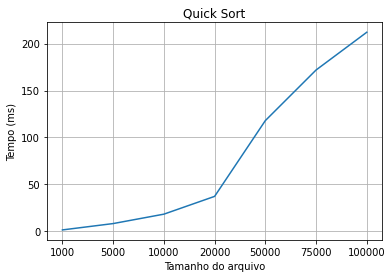

In [159]:

plt.plot(arr, execution_time_quick_sort_list)
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.title("Quick Sort")
plt.grid(True)
plt.savefig('temp/grafico-quick.png')
plt.show()

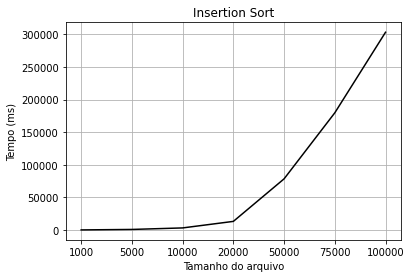

In [160]:
plt.plot(arr, execution_time_insertion_sort_list, color = "black")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.title("Insertion Sort")
plt.grid(True)
plt.savefig('temp/grafico-insertion.png')
plt.show()

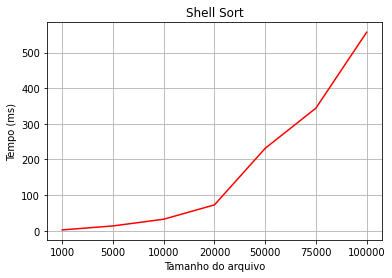

In [161]:
plt.plot(arr, execution_time_shell_sort_list, color = "red")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.title("Shell Sort")
plt.grid(True)
plt.savefig('temp/grafico-shell.png')
plt.show()

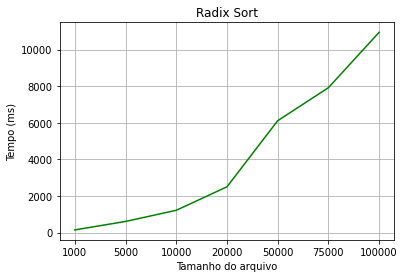

In [162]:
plt.plot(arr, execution_time_radix_sort_list, color = "green")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.title("Radix Sort")
plt.grid(True)
plt.savefig('temp/grafico-radix.png')
plt.show()

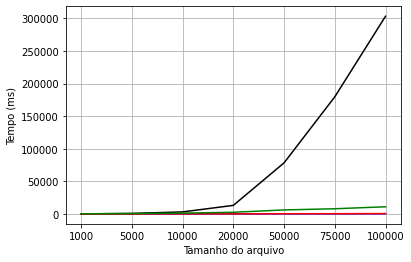

In [163]:
plt.plot(arr, execution_time_quick_sort_list, color = "blue")
plt.plot(arr, execution_time_insertion_sort_list, color = "black")
plt.plot(arr, execution_time_shell_sort_list, color = "red")
plt.plot(arr, execution_time_radix_sort_list, color = "green")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.grid(True)
plt.savefig('temp/grafico-quick-shell-insertion-radix.png')
plt.show()

# Tabela

In [164]:
table = [arr, execution_time_insertion_sort_list,execution_time_quick_sort_list,
         execution_time_radix_sort_list, execution_time_shell_sort_list]
labels = ['Insertion', 'Quick', 'Radix', 'Shell']

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', showindex=labels))


╒═══════════╤═══════════╤═══════════╤═══════════╤════════════╤═══════════╤════════════╤════════════╕
│           │      1000 │      5000 │     10000 │      20000 │     50000 │      75000 │     100000 │
╞═══════════╪═══════════╪═══════════╪═══════════╪════════════╪═══════════╪════════════╪════════════╡
│ Insertion │  28.605   │ 756.897   │ 3088.19   │ 13110.7    │ 78388.9   │ 179716     │ 303351     │
├───────────┼───────────┼───────────┼───────────┼────────────┼───────────┼────────────┼────────────┤
│ Quick     │   1.35398 │   8.12292 │   18.1487 │    37.113  │   117.895 │    171.842 │    212.114 │
├───────────┼───────────┼───────────┼───────────┼────────────┼───────────┼────────────┼────────────┤
│ Radix     │ 144.299   │ 607.089   │ 1216.9    │  2501.12   │  6114.31  │   7920.5   │  10950.5   │
├───────────┼───────────┼───────────┼───────────┼────────────┼───────────┼────────────┼────────────┤
│ Shell     │   2.21586 │  13.4339  │   32.2788 │    72.5312 │   231.333 │    344.167 │    

# Analise de complexidade

* qual o melhor caso?
* qual o pior caso?
* qual o caso médio? 

InsertionSort

* Melhor caso quando o Array já está ordenado;
  * Θ(n).
* Pior caso quando o Array está na ordem decrescente;
  * Θ(n2)
* qual o caso médio para um arranjo aleatorio? 
  * Θ(n2)
* qual o caso médio para um arranjo quase ordenado? 
  * Θ(n)

QuickSort

* Melhor caso quando as partições são balanceadas;
  * Θ(n)
* Pior caso quando as chamadas recursivas produzem partições com 0 e n−1 elementos;
  * O(n2)
* qual o caso medio?
  * Θ(nlogn)

ShellSort

**O Shellsort é uma ótima opção para listas de tamanho médio, é um
método simples e eficiente**

* Melhor caso quando os elementos já estao ordenados;
  * O(n)
* Pior caso;
  * O(n log2 n)
* qual o caso medio?
  * a complexidade depende de h, portanto não pode ser definida

**As fórmulas de complexidade deste algoritmo são bem vagas, pois até hoje
ninguém foi capaz de analisar este algoritmo, isso se devea problemas matemáticos
muito difíceis que sua análise traz. O que se sabe é que
nenhum h pode ser múltiplo do anterior.**

RadixSort

* Melhor caso com digitos pequenos
  * 
* Pior caso com digitos grandes
  * 
* Caso medio
  * O(n)

**A grande
vantagem desse algoritmo é que ele ordena em tempo linear**

In [165]:
def read_test_files():
    files = []
    path = "resources/test/"
    names = [path + "random.txt", path + "ordAsc.txt", path + "ordDesc.txt"]
    
    for name in names:
        arq = open(name, 'r', encoding="utf8")

        arq_list = arq.read().split()

        arq_int = []
        for val in arq_list:
            arq_int.append(int(val))

        arq.close()
        
        files.append(arq_int)
    
    return files  

In [166]:
files = read_test_files()

In [167]:
execution_time_insertion = []
for file in files:
  execution_time_insertion.append(get_time_insetion_sort_ms(file))

In [168]:
execution_time_shell = []
for file in files:
  execution_time_shell.append(get_time_shell_sort_ms(file))

In [169]:
execution_time_quick = []
for file in files:
  execution_time_quick.append(get_time_quick_sort_ms(file))

In [170]:
execution_time_radix = []
for file in files:
  execution_time_radix.append(get_time_radix_sort_ms(file))

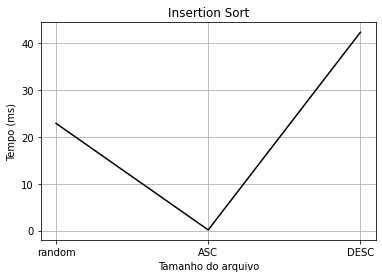

In [177]:
arr = ["random", "ASC", "DESC"]
plt.plot(arr, execution_time_insertion, color="black")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.title("Insertion Sort")
plt.grid(True)
plt.savefig('temp/grafico-insertion-test.png')
plt.show()

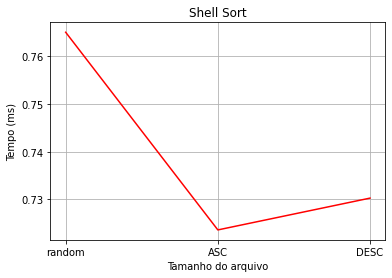

In [178]:
arr = ["random", "ASC", "DESC"]
plt.plot(arr, execution_time_shell, color="red")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.title("Shell Sort")
plt.grid(True)
plt.savefig('temp/grafico-shell-test.png')
plt.show()

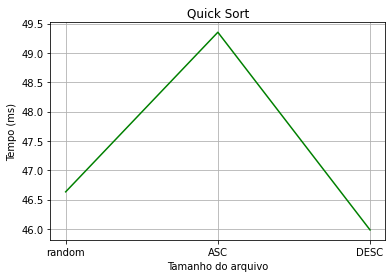

In [173]:
arr = ["random", "ASC", "DESC"]
plt.plot(arr, execution_time_quick, color="blue")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.title("Quick Sort")
plt.grid(True)
plt.savefig('temp/grafico.png')
plt.show()

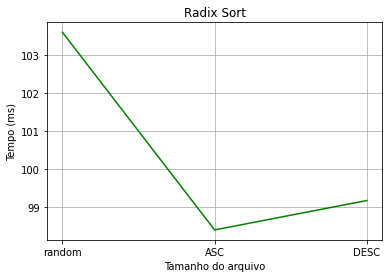

In [174]:
arr = ["random", "ASC", "DESC"]
plt.plot(arr, execution_time_radix, color="green")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.title("Radix Sort")
plt.grid(True)
plt.savefig('temp/grafico-radix-test.png')
plt.show()

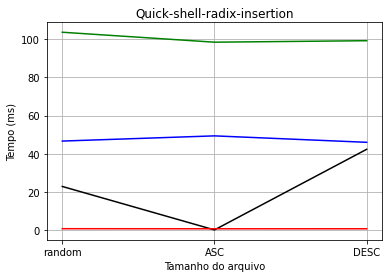

In [180]:
plt.plot(arr, execution_time_quick, color="blue")
plt.plot(arr, execution_time_insertion, color="black")
plt.plot(arr, execution_time_shell, color="red")
plt.plot(arr, execution_time_radix, color="green")
plt.title("Quick-shell-radix-insertion")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.grid(True)
plt.savefig('temp/grafico-quick-shell-insertion-radix-test.png')
plt.show()